In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
def der_x(x, y, z, r):
    return 10 * (y - x)


def der_y(x, y, z, r):
    return r * x - y - x * z


def der_z(x, y, z, r):
    return x * y - 8 * z / 3

In [6]:
import numpy as np
x0 = 1.0
y0 = 1.0
z0 = 10.0
step = 0.001
t_end = 20000.0
r_s = [148.5, 147.5]
delta = 4.669
for i in range(6):
    r_s.append(r_s[-1] + (r_s[-1] - r_s[-2]) / delta)

In [7]:
r_s

[148.5,
 147.5,
 147.28582137502679,
 147.23994889163137,
 147.23012398621364,
 147.22801970148078,
 147.22756900867014,
 147.22747247990367]

In [22]:
from collections import Counter


def get_period(x, y, z, threshold):
    index = len(x) - 1
    point = (x[index], y[index], z[index])
    similar = [i for i in range(len(x)) \
               if abs(x[i]-point[0]) < threshold \
               and abs(y[i]-point[1]) < threshold \
               and abs(z[i]-point[2]) < threshold]
    periods = [abs(similar[i+1] - similar[i]) * step for i in range(len(similar)-1)]
    periods_counts = Counter()
    periods_counts.update(periods)
    result = periods_counts.most_common()
    if len(result) > 0 and len(result[0]) > 0:
        return result[0][0]
    else:
        return None
    
    
def get_period2(x, y, z, threshold):
    index = len(x) - 1
    point = (x[index], y[index], z[index])
    similar = [i for i in range(len(x)) \
               if abs(x[i]-point[0]) < threshold \
               and abs(y[i]-point[1]) < threshold \
               and abs(z[i]-point[2]) < threshold]
    periods = [abs(similar[i] - similar[j]) * step for i in range(len(similar)) for j in range(len(similar)) if i != j]
    periods_counts = Counter()
    periods_counts.update(periods)
    result = periods_counts.most_common()
    if len(result) > 0 and len(result[0]) > 0:
        return result[0][0]
    else:
        return None

In [6]:
# plt.figure(figsize=(40, 20))
x_s = []
y_s = []
z_s = []
for r in r_s:
    x = [x0, ]
    y = [y0, ]
    z = [z0, ]
    for t in np.arange(0., t_end, step):
        x_inter = x[-1] + step * der_x(x[-1], y[-1], z[-1], r)
        y_inter = y[-1] + step * der_y(x[-1], y[-1], z[-1], r)
        z_inter = z[-1] + step * der_z(x[-1], y[-1], z[-1], r)
#         x.append(x_inter)
#         y.append(y_inter)
#         z.append(z_inter)
        x.append(x[-1] + step / 2 * (der_x(x[-1], y[-1], z[-1], r) + der_x(x_inter, y_inter, z_inter, r)))
        y.append(y[-1] + step / 2 * (der_y(x[-1], y[-1], z[-1], r) + der_y(x_inter, y_inter, z_inter, r)))
        z.append(z[-1] + step / 2 * (der_z(x[-1], y[-1], z[-1], r) + der_z(x_inter, y_inter, z_inter, r)))
    x_s.append(x)
    y_s.append(y)
    z_s.append(z)
    print(r)
    
# plt.title("trajectories")
# plt.xlabel("x")
# plt.ylabel("y")
# plt.scatter([x0], [y0])

148.5
147.5
147.28582137502679
147.23994889163137
147.23012398621364
147.22801970148078
147.22756900867014
147.22747247990367


In [9]:
periods = []
x_s = []
y_s = []
z_s = []
for r in r_s:
    x = [x0, ]
    y = [y0, ]
    z = [z0, ]
    for t in np.arange(0., t_end, step):      
        x.append(x[-1] + step * der_x(x[-1], y[-1], z[-1], r))
        y.append(y[-1] + step * der_y(x[-1], y[-1], z[-1], r))
        z.append(z[-1] + step * der_z(x[-1], y[-1], z[-1], r))
    x_s.append(x)
    y_s.append(y)
    z_s.append(z)
    print(r)

148.5
147.5
147.28582137502679
147.23994889163137
147.23012398621364
147.22801970148078
147.22756900867014
147.22747247990367


In [10]:
periodss = []
for threshold in [5e-2, 1e-3, 2e-3, 5e-3, 1e-4, 1e-5, 2e-5, 1e-6]:
    periods = []
    for i in range(len(x_s)):
        period = get_period(x_s[i], y_s[i], z_s[i], threshold)
        periods.append(period)
    periodss.append(periods)

In [11]:
for i in range(8):    
    print('r', 'period length')
    for j in range(len(periodss[i])):
        print(r_s[j], periodss[i][j])

r period length
148.5 5.962
147.5 8.377
147.28582137502679 20.36
147.23994889163137 8.385
147.23012398621364 1.198
147.22801970148078 1.198
147.22756900867014 1.198
147.22747247990367 1.198
r period length
148.5 410.185
147.5 1351.094
147.28582137502679 160.485
147.23994889163137 277.901
147.23012398621364 432.439
147.22801970148078 109.009
147.22756900867014 271.924
147.22747247990367 136.561
r period length
148.5 410.185
147.5 432.015
147.28582137502679 160.485
147.23994889163137 277.901
147.23012398621364 44.322
147.22801970148078 97.03
147.22756900867014 37.135
147.22747247990367 99.426
r period length
148.5 134.741
147.5 55.049
147.28582137502679 160.485
147.23994889163137 63.486000000000004
147.23012398621364 44.322
147.22801970148078 11.979000000000001
147.22756900867014 37.135
147.22747247990367 37.135
r period length
148.5 11748.7
147.5 4485.2970000000005
147.28582137502679 8092.5160000000005
147.23994889163137 2842.496
147.23012398621364 4202.205
147.22801970148078 739.105
14

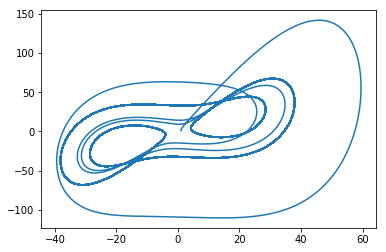

In [20]:
plt.plot(x_s[0][:100000], y_s[0][:100000])

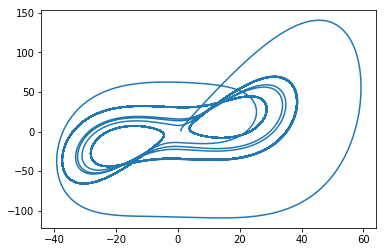

In [21]:
plt.plot(x_s[1][:100000], y_s[1][:100000])

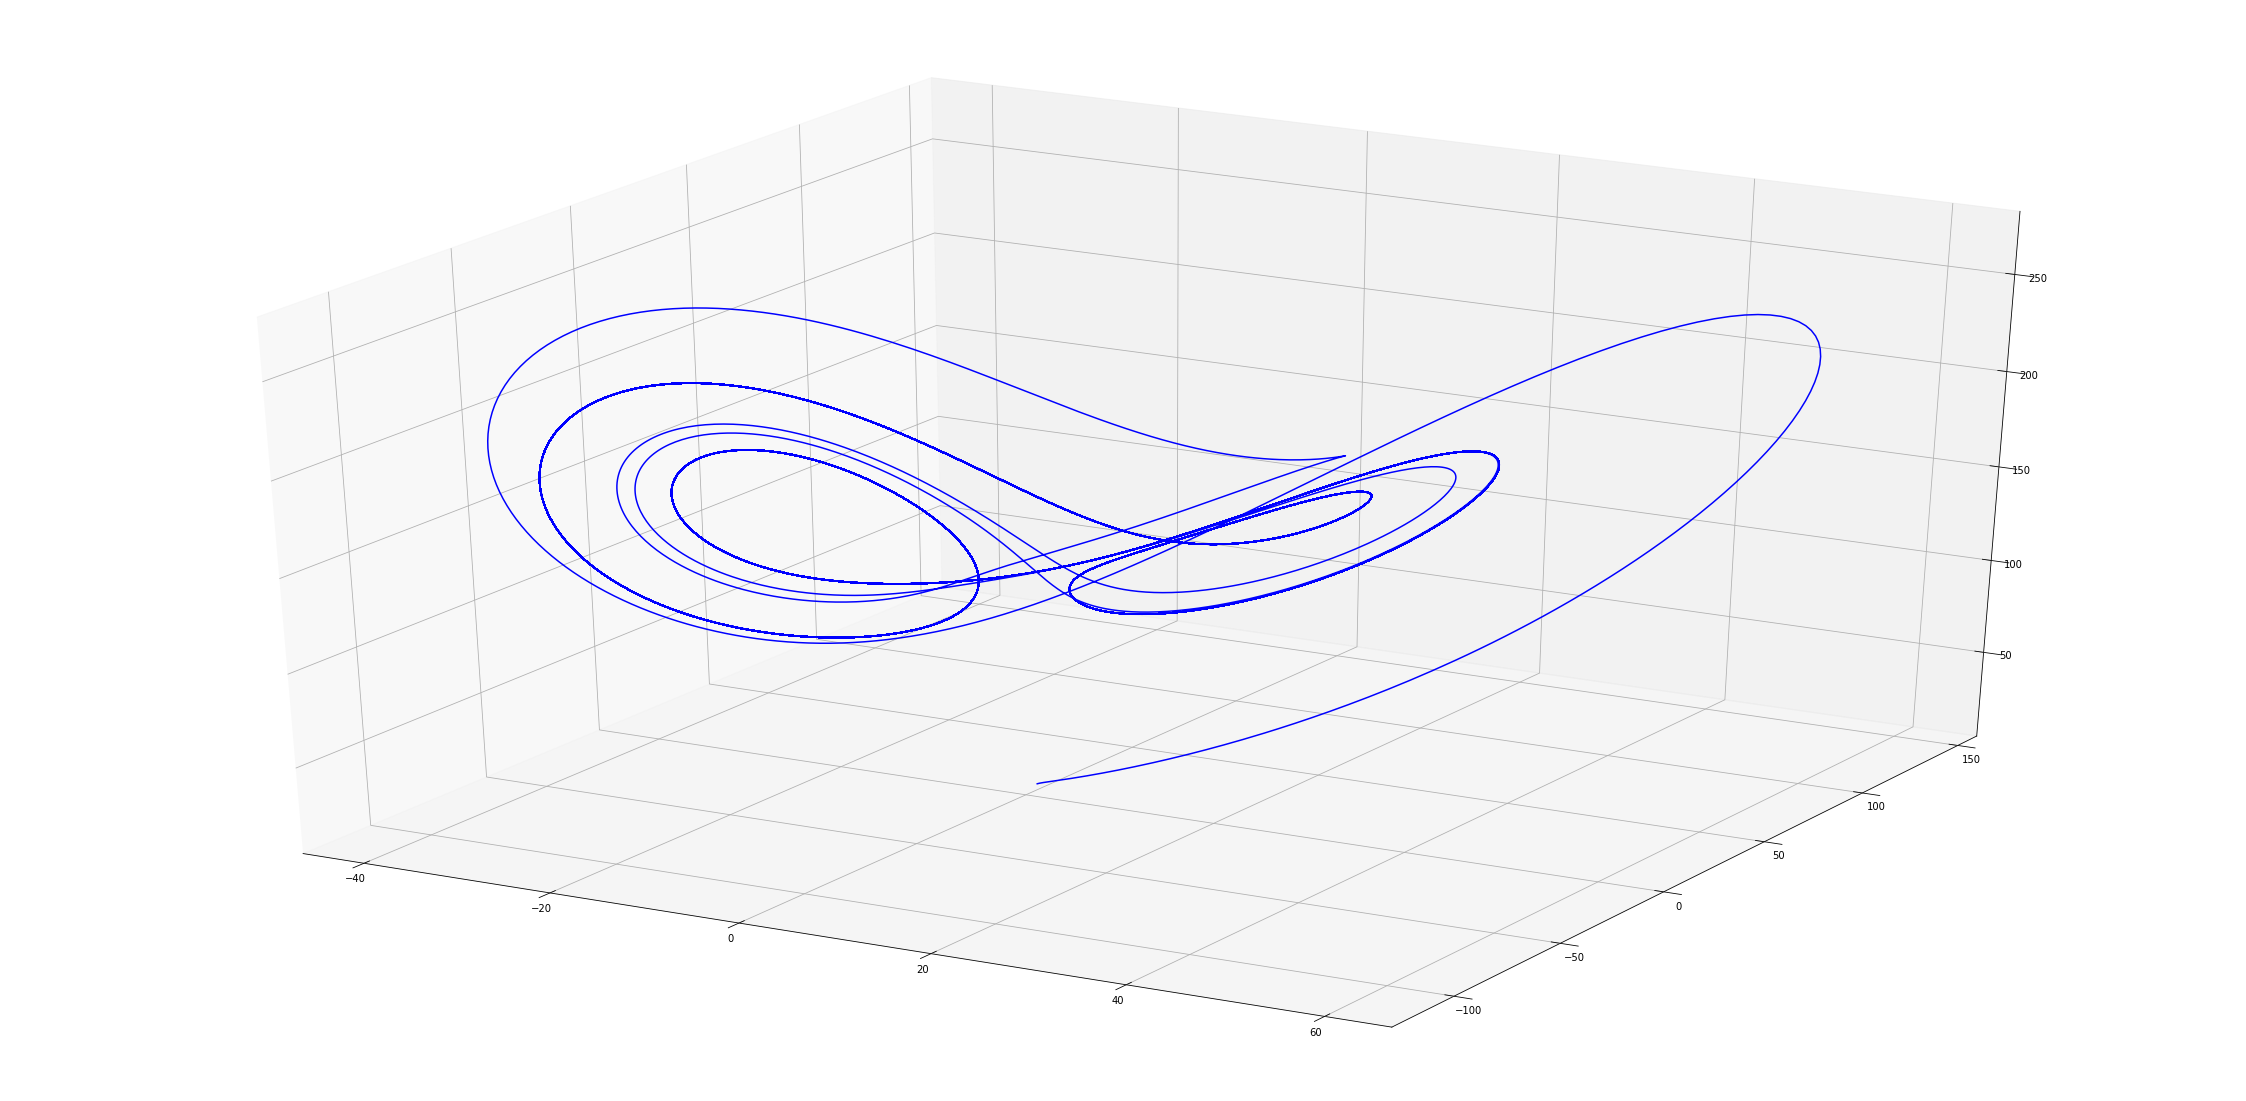

In [14]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(40, 20))
ax = fig.gca(projection='3d')
lim_mem = 100000
#ax.plot_surface(x, y, np.ones(x.shape) * logs2[index])
xx = x_s[0][:lim_mem]
yy = y_s[0][:lim_mem]
zz = z_s[0][:lim_mem]
ax.plot(xx, yy, zz, color = 'blue')

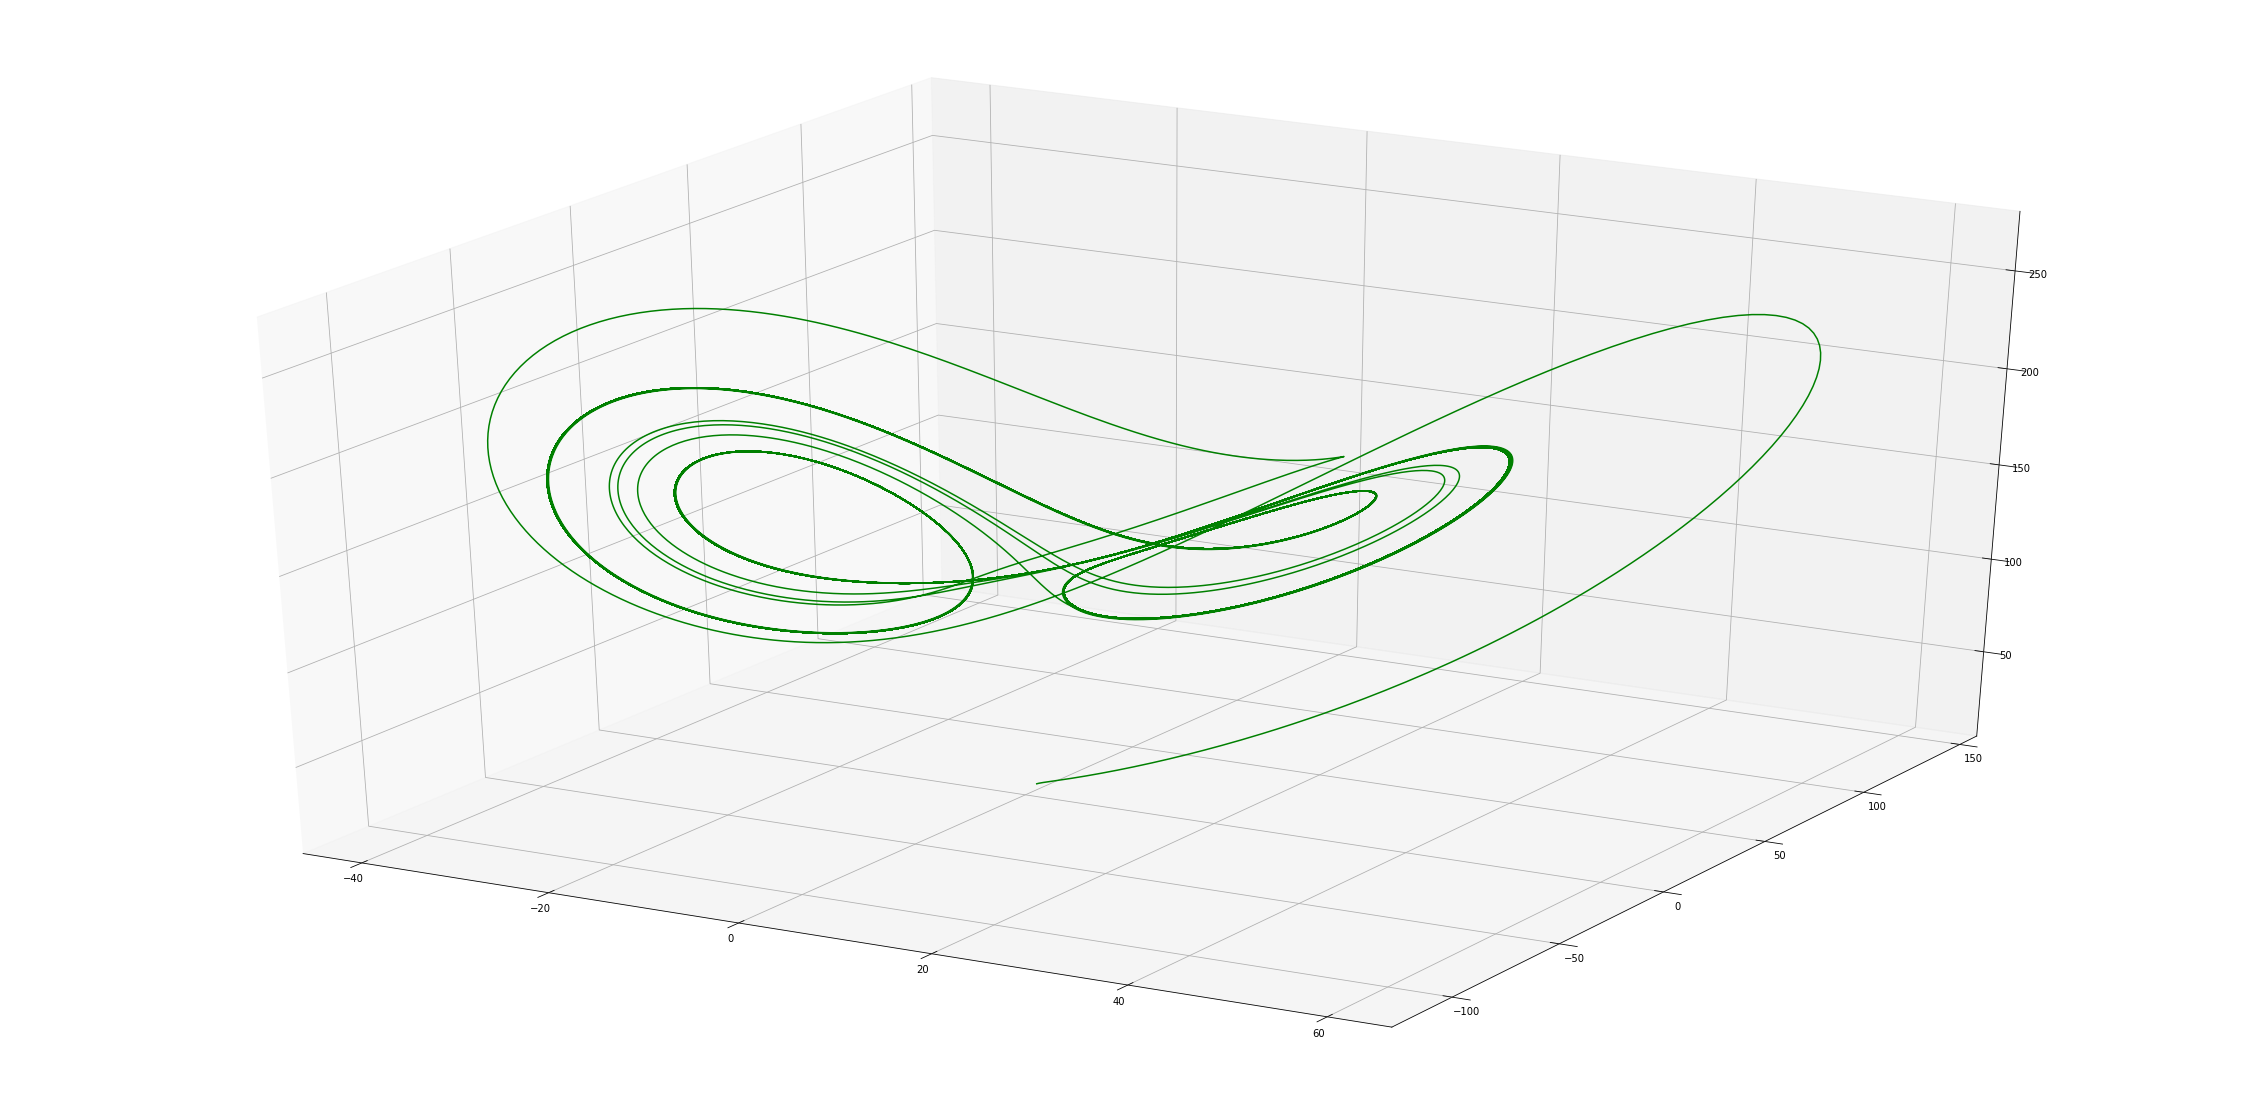

In [15]:
fig = plt.figure(figsize=(40, 20))
ax = fig.gca(projection='3d')
lim_mem = 100000
xx = x_s[1][:lim_mem]
yy = y_s[1][:lim_mem]
zz = z_s[1][:lim_mem]
ax.plot(xx, yy, zz, color = 'green')